# EDA
### 1. 데이터 탐색을 해보자

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
regular_origin = pd.read_csv('Regular_Season_Batter.csv')

In [7]:
regular = regular_origin[['batter_name','year','AB','position','OPS']]

* 총 몇명의 타자가 있는가를 nunique를 이용하여 파악 

In [8]:
regular['batter_name'].nunique()

345

* year의 분포를 살펴보자

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


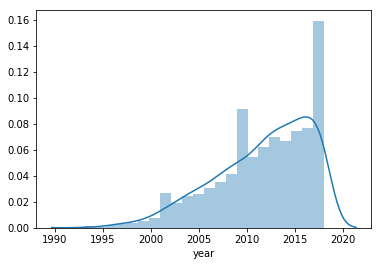

In [9]:
sns.distplot(regular['year'])

year이 늘어날수록 증가세이다.

In [10]:
regular['year'].describe()

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

* AB를 살펴보자<br>AB=해당 타자가 타석에 들어선 횟수

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


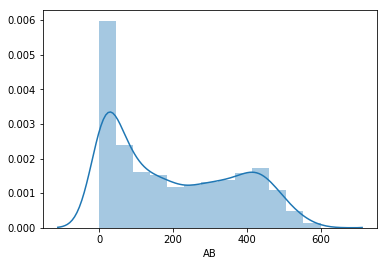

In [11]:
sns.distplot(regular['AB'])

100타석의 미만의 선수가 대부분이다.

In [12]:
regular['AB'].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

* position을 살펴보자<br>
  categorical data는 value_counts를 활용해보자

In [13]:
regular['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

양타의 빈도수가적으며 우투우타가 가장 많다.

* OPS를 살펴보자<br>
  OPS column의 경우 2454개의 NA값이 존재하기 때문에 먼저 이를 해결해야한다.

In [14]:
regular['OPS'].isnull().count()

2454

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


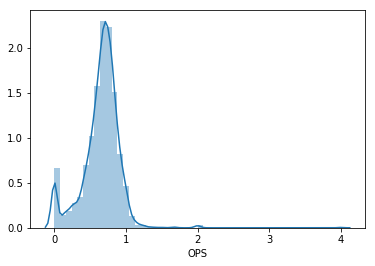

In [15]:
sns.distplot(regular['OPS'].dropna())


* 위 코드에서 주의할 점이 있다. 결측값을 제거하는 것은 신중해야한다.<br>
  따라서 sns코드 안에 결측값 코드를 넣어 그래프를 그릴때에만 잠깐 OPS의 결측값을 제거해보자

In [16]:
regular['OPS'].describe()

count    2428.000000
mean        0.649939
std         0.261634
min         0.000000
25%         0.546000
50%         0.688637
75%         0.797234
max         4.000000
Name: OPS, dtype: float64

* scatter plot를 이용하여 변수들간의 관계를 살펴보자

Text(0,0.5,'OPS')

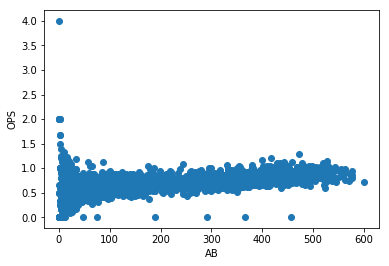

In [17]:
plt.scatter(regular['AB'],regular['OPS'])
plt.xlabel('AB')
plt.ylabel('OPS')

Text(0,0.5,'AB')

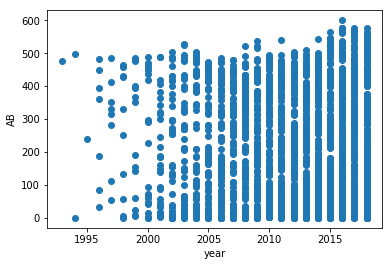

In [18]:
plt.scatter(regular['year'],regular['AB'])
plt.xlabel('year')
plt.ylabel('AB')

* categorical data의 그룹별 특징을 파악해보자

In [19]:
regular.groupby(['position'])['OPS'].mean()

position
내야수(우투양타)    0.275000
내야수(우투우타)    0.674866
내야수(우투좌타)    0.642086
내야수(좌투좌타)    0.748972
외야수(우투양타)    0.697714
외야수(우투우타)    0.665179
외야수(우투좌타)    0.685956
외야수(좌투좌타)    0.656005
포수(우투우타)     0.613227
포수(우투좌타)     0.592643
Name: OPS, dtype: float64

In [20]:
regular.groupby(['position'])['AB'].mean()

position
내야수(우투양타)     25.142857
내야수(우투우타)    229.539658
내야수(우투좌타)    183.092199
내야수(좌투좌타)    271.027778
외야수(우투양타)    169.571429
외야수(우투우타)    205.665217
외야수(우투좌타)    250.141304
외야수(좌투좌타)    259.388060
포수(우투우타)     142.417989
포수(우투좌타)     120.142857
Name: AB, dtype: float64

### 데이터 잘라내기

* 특정 row추출<br>
* ops가 0.9보다 높은 row , 타자이름이 박석민인 row를 추출해보자<br><br>
  loc,iloc를 이용해보자


In [21]:
regular_origin.loc[regular_origin['OPS']>0.9]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,...,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,...,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,...,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,...,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
97,10,강정호,2014,넥센,0.356,117,418,103,149,36,...,8,0.739234,0.460922,9,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,1.200156
98,11,강진성,2013,NC,0.500,3,2,1,1,1,...,0,1.000000,0.667000,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,1.667000
99,11,강진성,2017,NC,0.296,28,27,5,8,3,...,1,0.519000,0.406000,0,180cm/81kg,1993년 10월 19일,내야수(우투우타),가동초-잠신중-경기고-NC-경찰,7000만원,0.925000
130,17,고영민,2013,두산,0.286,10,14,3,4,1,...,1,0.571429,0.411765,0,NaN,1984년 02월 08일,NaN,도신초-영남중-성남고-두산,NaN,0.983193
135,230,이종환,2012,KIA,0.385,6,13,2,5,2,...,0,0.769231,0.384615,0,NaN,1986년 05월 08일,NaN,태안초-태안중-북일고-단국대-KIA-상무-KIA,NaN,1.153846


In [24]:
regular_origin.loc[regular_origin['batter_name']=="박석민"]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,...,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,...,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,...,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,...,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,...,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,...,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,...,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,...,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,...,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992


* 박석민의 연도별 OPS를 알아보자

In [25]:
regular_origin.loc[regular['batter_name']=="박석민"][["year","OPS"]]

,year,OPS
797,2004,0.429
798,2005,0.542
799,2008,0.835
800,2009,1.002
801,2010,0.920
802,2011,0.816
803,2012,0.957
804,2013,0.940
805,2014,1.020
806,2015,0.992


* 이름이 박석민이면서 year은 2009인 row추출하기<br>
  2가지 이상의 조건을 만족하는 row추출

In [69]:
regular_origin.loc[(regular['batter_name']=="박석민")&(regular['year']==2009)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002


주의! year column의 타입은 int형이다. 따라서 regular['year']=="2009"로 설정하는 실수를 저지르지 않도록 항상 datatype에 유의하자.

### for문

In [87]:
for i in ['박석민','채태인','최형우','박해민']:
    print("%s의 연도별 OPS" %i)
    print(regular_origin.loc[regular_origin['batter_name']==i][['year','OPS']])
    print('\n')

박석민의 연도별 OPS
     year    OPS
797  2004  0.429
798  2005  0.542
799  2008  0.835
800  2009  1.002
801  2010  0.920
802  2011  0.816
803  2012  0.957
804  2013  0.940
805  2014  1.020
806  2015  0.992
807  2016  0.982
808  2017  0.792
809  2018  0.816


채태인의 연도별 OPS
      year    OPS
2171  2007  0.602
2172  2008  0.766
2173  2009  0.896
2174  2010  0.800
2175  2011  0.691
2176  2012  0.602
2177  2013  1.001
2178  2014  0.852
2179  2015  0.885
2180  2016  0.742
2181  2017  0.888
2182  2018  0.816


최형우의 연도별 OPS
      year    OPS
2315  2002  1.200
2316  2004  0.000
2317  2008  0.851
2318  2009  0.883
2319  2010  0.913
2320  2011  1.044
2321  2012  0.773
2322  2013  0.896
2323  2014  1.075
2324  2015  0.965
2325  2016  1.115
2326  2017  1.026
2327  2018  0.963


박해민의 연도별 OPS
     year    OPS
931  2013    NaN
932  2014  0.749
933  2015  0.724
934  2016  0.767
935  2017  0.731
936  2018  0.792




* iloc를 이용해보자

In [91]:
for i in (0,1,2,3,5):
    print('%d번째 OPS' %(i+1))
    print(regular_origin['OPS'].iloc[i])
    print('\n')

1번째 OPS
0.902


2번째 OPS
0.0


3번째 OPS
0.6859999999999999


4번째 OPS
0.6729999999999999


6번째 OPS
0.552




이것을 어떻게 활용할 수 있을까? 조금만 응용해본다면 아래와 같이

In [92]:
for i in range (500):
    print('%d번째 OPS' %(i+1))
    print(regular_origin['OPS'].iloc[i])
    print('\n')

1번째 OPS
0.902


2번째 OPS
0.0


3번째 OPS
0.6859999999999999


4번째 OPS
0.6729999999999999


5번째 OPS
0.489


6번째 OPS
0.552


7번째 OPS
0.774


8번째 OPS
0.0


9번째 OPS
0.6000000000000001


10번째 OPS
0.0


11번째 OPS
0.0


12번째 OPS
0.6000000000000001


13번째 OPS
0.41548691548691546


14번째 OPS
0.5205314009661836


15번째 OPS
0.0


16번째 OPS
0.0


17번째 OPS
0.5156862745098039


18번째 OPS
0.5942622950819672


19번째 OPS
nan


20번째 OPS
0.6157974660067002


21번째 OPS
0.6628473301653566


22번째 OPS
0.5755494505494505


23번째 OPS
0.7380967135568363


24번째 OPS
0.8312472226336839


25번째 OPS
0.8156615074423293


26번째 OPS
0.8472435300021507


27번째 OPS
0.8338632787732194


28번째 OPS
0.7573354363672546


29번째 OPS
0.7489311367004903


30번째 OPS
0.6673319411033862


31번째 OPS
0.7796059017666472


32번째 OPS
0.653967281952585


33번째 OPS
0.7850834027304616


34번째 OPS
0.7601225934559268


35번째 OPS
0.7746134374911122


36번째 OPS
0.7532228360957642


37번째 OPS
0.8235294117647058


38번째 OPS
0.8464052287581699


39번째 OPS
0.0


40번째 OPS
0.

0.7649999999999999


393번째 OPS
0.794


394번째 OPS
0.674


395번째 OPS
0.6930000000000001


396번째 OPS
0.741


397번째 OPS
0.645


398번째 OPS
0.6670733606770157


399번째 OPS
0.6815014254038645


400번째 OPS
0.7654301247201791


401번째 OPS
0.7531641604010024


402번째 OPS
0.5397546569741027


403번째 OPS
0.0


404번째 OPS
0.467


405번째 OPS
0.603


406번째 OPS
0.725


407번째 OPS
0.607


408번째 OPS
0.639


409번째 OPS
0.8


410번째 OPS
0.6729999999999999


411번째 OPS
0.5429999999999999


412번째 OPS
0.5833333333333333


413번째 OPS
0.7952380952380953


414번째 OPS
0.475


415번째 OPS
0.5837104072398189


416번째 OPS
0.5890302066772655


417번째 OPS
0.11692307692307695


418번째 OPS
0.7824054398640035


419번째 OPS
0.6608802686240259


420번째 OPS
0.7686835339488138


421번째 OPS
0.8621713886350196


422번째 OPS
0.6882749874209935


423번째 OPS
0.7243018933171954


424번째 OPS
0.8129329599437648


425번째 OPS
0.6466211484593838


426번째 OPS
0.6608247422680412


427번째 OPS
0.7802820871412929


428번째 OPS
0.6399439601494397


429번째 OPS
0.5329999999

또 , 계산결과 또한 낼 수 있다. 단순한 예시로 ops-avg를 한 계산결과를 순서대로 추출해본다면,

In [95]:
for i in range (500):
    print('%d번째 OPS-avg 값은' %(i+1))
    print(regular_origin['OPS'].iloc[i]-regular_origin['avg'].iloc[i])
    print('\n')

1번째 OPS-avg 값은
0.5630000000000001


2번째 OPS-avg 값은
0.0


3번째 OPS-avg 값은
0.46499999999999997


4번째 OPS-avg 값은
0.4159999999999999


5번째 OPS-avg 값은
0.33099999999999996


6번째 OPS-avg 값은
0.3380000000000001


7번째 OPS-avg 값은
0.496


8번째 OPS-avg 값은
0.0


9번째 OPS-avg 값은
0.4000000000000001


10번째 OPS-avg 값은
0.0


11번째 OPS-avg 값은
0.0


12번째 OPS-avg 값은
0.4000000000000001


13번째 OPS-avg 값은
0.28848691548691546


14번째 OPS-avg 값은
0.38153140096618354


15번째 OPS-avg 값은
0.0


16번째 OPS-avg 값은
0.0


17번째 OPS-avg 값은
0.3396862745098038


18번째 OPS-avg 값은
0.36326229508196717


19번째 OPS-avg 값은
nan


20번째 OPS-avg 값은
0.37379746600670016


21번째 OPS-avg 값은
0.3938473301653566


22번째 OPS-avg 값은
0.36354945054945054


23번째 OPS-avg 값은
0.46509671355683624


24번째 OPS-avg 값은
0.525247222633684


25번째 OPS-avg 값은
0.5346615074423293


26번째 OPS-avg 값은
0.5572435300021508


27번째 OPS-avg 값은
0.5558632787732194


28번째 OPS-avg 값은
0.4693354363672546


29번째 OPS-avg 값은
0.46093113670049024


30번째 OPS-avg 값은
0.42133194110338623


31번째 OPS

385번째 OPS-avg 값은
1.0


386번째 OPS-avg 값은
nan


387번째 OPS-avg 값은
0.2


388번째 OPS-avg 값은
0.0


389번째 OPS-avg 값은
0.43399999999999994


390번째 OPS-avg 값은
0.3649999999999999


391번째 OPS-avg 값은
0.46900000000000003


392번째 OPS-avg 값은
0.4679999999999999


393번째 OPS-avg 값은
0.47500000000000003


394번째 OPS-avg 값은
0.403


395번째 OPS-avg 값은
0.4160000000000001


396번째 OPS-avg 값은
0.423


397번째 OPS-avg 값은
0.402


398번째 OPS-avg 값은
0.4640733606770157


399번째 OPS-avg 값은
0.4215014254038645


400번째 OPS-avg 값은
0.5204301247201791


401번째 OPS-avg 값은
0.5001641604010024


402번째 OPS-avg 값은
0.36275465697410275


403번째 OPS-avg 값은
0.0


404번째 OPS-avg 값은
0.31300000000000006


405번째 OPS-avg 값은
0.356


406번째 OPS-avg 값은
0.44899999999999995


407번째 OPS-avg 값은
0.367


408번째 OPS-avg 값은
0.388


409번째 OPS-avg 값은
0.48200000000000004


410번째 OPS-avg 값은
0.4049999999999999


411번째 OPS-avg 값은
0.30999999999999994


412번째 OPS-avg 값은
0.33333333333333326


413번째 OPS-avg 값은
0.5182380952380954


414번째 OPS-avg 값은
0.30399999999999994


415